In [24]:
import os
import random
import shutil

In [25]:
dataOrgFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Weather Dataset Original/"
dataBaseFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset 2/" 

In [26]:
dataDirList = os.listdir(dataOrgFolder)
print(dataDirList)

['cloudy', '.DS_Store', 'shine', 'test.csv', 'sunrise', 'rainy', 'alien_test', 'foggy']


In [27]:
splitSize = .85

# build files array
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE) :
        file_path = os.path.join(SOURCE, filename)
        if os.path.getsize(file_path) > 0:
            files.append(filename)
        else: 
            print(filename + "has 0 length, will not copy this file !!")
    # print folder names
    print(f"Total files: {len(files)}")

    # Split files into training and validation sets
    trainLength = int(len(files)*SPLIT_SIZE)
    validLength = int(len(files) - trainLength)

    suffleDataSet = random.sample(files, len(files))

    trainingSet = suffleDataSet[0:trainLength]
    validSet = suffleDataSet[trainLength:]

    # Copy training files
    for filename in trainingSet:
        src = os.path.join(SOURCE,filename)
        dst = os.path.join(TRAINING,filename)
        shutil.copy(src,dst)
    
    # Copy valid images
    for filename in validSet:
        src = os.path.join(SOURCE,filename)
        dst = os.path.join(VALIDATION,filename)
        shutil.copy(src,dst)
           

In [28]:
cloudySourceFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Weather Dataset Original/cloudy/"
cloudyTrainFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Train/cloudy/"
cloudyValidFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Validate/cloudy/"

rainySourceFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Weather Dataset Original/rainy/"
rainyTrainFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Train/rainy/"
rainyValidFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Validate/rainy/"

foggySourceFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Weather Dataset Original/foggy/"
foggyTrainFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Train/foggy/"
foggyValidFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Validate/foggy/"

shineSourceFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Weather Dataset Original/shine/"
shineTrainFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Train/shine/"
shineValidFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Validate/shine/"

sunriseSourceFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Weather Dataset Original/sunrise/"
sunriseTrainFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Train/sunrise/"
sunriseValidFolder = "/Users/tassnymechchahed/Desktop/Weather Dataset /Validate/sunrise/"


In [23]:
split_data(cloudySourceFolder,cloudyTrainFolder,cloudyValidFolder,splitSize)
split_data(rainySourceFolder,rainyTrainFolder,rainyValidFolder,splitSize)
split_data(foggySourceFolder,foggyTrainFolder,foggyValidFolder,splitSize)
split_data(shineSourceFolder,shineTrainFolder,shineValidFolder,splitSize)
split_data(sunriseSourceFolder,sunriseTrainFolder,sunriseValidFolder,splitSize)

Total files: 300
Total files: 300
Total files: 300
Total files: 250
Total files: 350


In [29]:
# Let's create the model 
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


2024-08-10 14:19:29.040257: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
imgWidth = 256
imgHeight = 256
batchSize = 16

TRAIN_DIR = "/Users/tassnymechchahed/Desktop/Weather Dataset /Train/"

# Data augmentation
train_datagetn = ImageDataGenerator (rescale = 1/255.0,
                                     rotation_range = 30,
                                     zoom_range = 0.4,
                                     horizontal_flip = True)

# Normalizing
train_data_set = train_datagetn.flow_from_directory(TRAIN_DIR,
                                                    batch_size = batchSize,
                                                    class_mode = 'categorical',
                                                    target_size = (imgHeight, imgWidth))

VALIDATION_DIR = "/Users/tassnymechchahed/Desktop/Weather Dataset /Validate/"
val_datagen =  ImageDataGenerator(rescale = 1/255.0) #resizing
# Normalizing
val_data_set = val_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size = batchSize,
                                                    class_mode = 'categorical',
                                                    target_size = (imgHeight, imgWidth))

# Early Stopping 

callback = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, mode = 'auto')

# save a model at each iteration in case previous ones are better than next one
best_model_file_path = "/Users/tassnymechchahed/Desktop/Weather Dataset /bestWeatherModel.h5"
best_model = ModelCheckpoint(best_model_file_path, monitor = "val_accuracy", verbose = 1, save_best_only=True)

Found 1274 images belonging to 5 classes.
Found 226 images belonging to 5 classes.


In [35]:
# Building the model
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu', input_shape =(imgHeight, imgWidth,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation = 'relu'),
    Conv2D(128,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3), activation = 'relu'),
    Conv2D(256,(3,3), activation = 'relu'),
    Conv2D(256,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(5, activation = 'softmax')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 58, 58, 64)       

Epoch 1/5


2024-08-11 16:13:19.374523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


80/80 [==============================] - ETA: 0s - loss: 1.2636 - accuracy: 0.4019

2024-08-11 16:14:00.706389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.45133, saving model to /Users/tassnymechchahed/Desktop/Weather Dataset /bestWeatherModel.h5
80/80 [==============================] - 44s 533ms/step - loss: 1.2636 - accuracy: 0.4019 - val_loss: 1.1367 - val_accuracy: 0.4513
Epoch 2/5
80/80 [==============================] - ETA: 0s - loss: 1.3428 - accuracy: 0.3752
Epoch 2: val_accuracy did not improve from 0.45133
80/80 [==============================] - 41s 514ms/step - loss: 1.3428 - accuracy: 0.3752 - val_loss: 1.3936 - val_accuracy: 0.3363
Epoch 3/5
80/80 [==============================] - ETA: 0s - loss: 1.2376 - accuracy: 0.4042
Epoch 3: val_accuracy did not improve from 0.45133
80/80 [==============================] - 42s 519ms/step - loss: 1.2376 - accuracy: 0.4042 - val_loss: 1.1543 - val_accuracy: 0.4292
Epoch 4/5
80/80 [==============================] - ETA: 0s - loss: 1.1873 - accuracy: 0.4372
Epoch 4: val_accuracy improved from 0.45133 to 0.46018, saving model to /Users/tassn

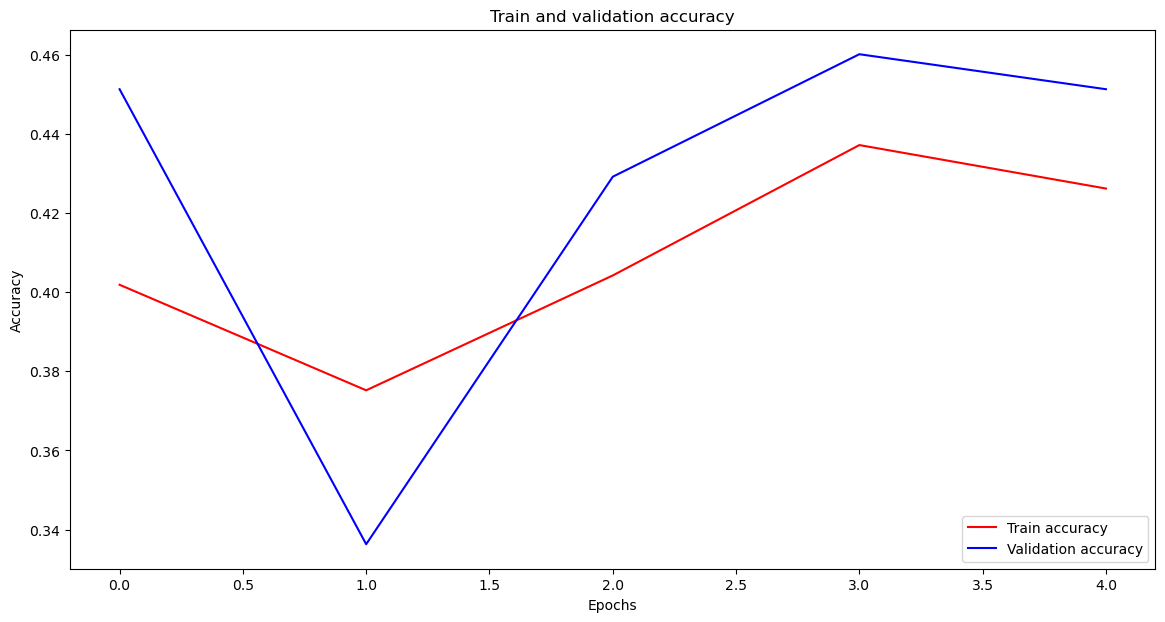

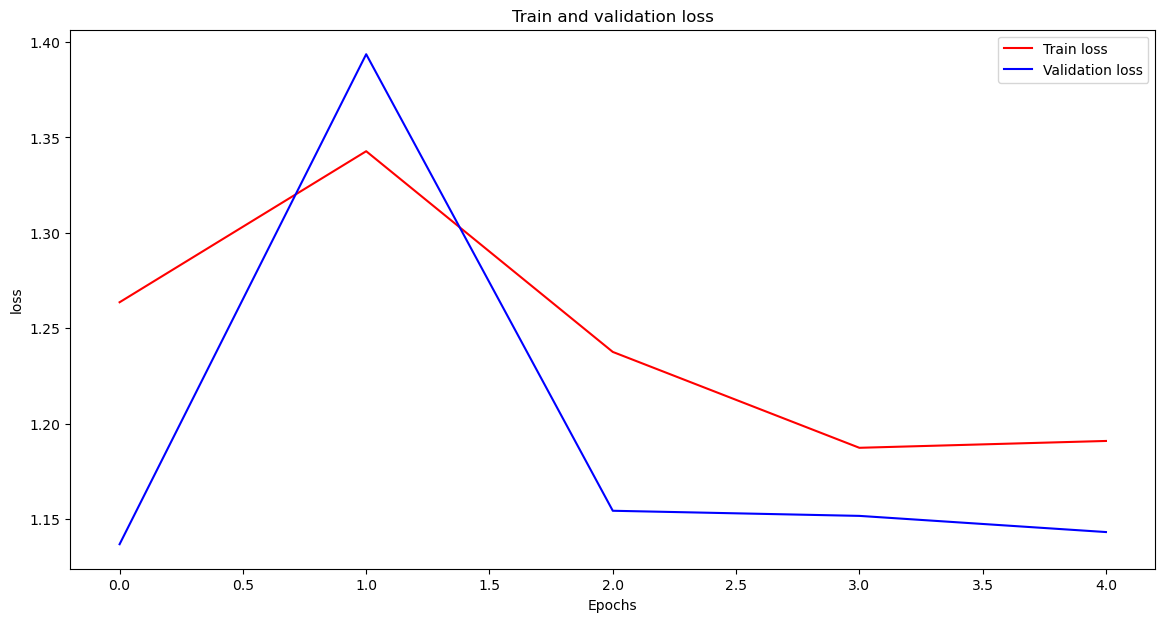

In [38]:
# Compile model
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data_set, epochs = 5, verbose= 1, validation_data=val_data_set, callbacks=[best_model])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#display graph of accuracy and loss
fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc, 'r', label = 'Train accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and validation accuracy')
plt.legend(loc = 'lower right')
plt.show()


fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss, 'r', label = 'Train loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Train and validation loss')
plt.legend(loc = 'upper right')
plt.show()

# save model 
model.save('/Users/tassnymechchahed/Desktop/Weather Dataset /bestWeatherModel.h5')